1. Configuración del Ambiente de Trabajo

In [41]:
# INMERSION DE DATOS CON PYTHON

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# drive.mount('/content/drive')  # Comentar esta línea si no estás en Google Colab
warnings.filterwarnings('ignore')

2. Preprocesamiento de Datos

In [42]:
pd.set_option('display.max_columns',None)
global df_banco, resultados

In [43]:
# noinspection PyRedeclaration
df_banco = pd.read_csv('german_credit .csv')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [44]:
df_banco.shape

(1000, 21)

In [45]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [46]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [47]:
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object', name='account_check_status')

In [48]:
columnas = list(df_banco.select_dtypes(include=['object']).columns)
for columna in columnas:
    print(f'El nombre de la columna: {columna}')
    print(list(df_banco[f'{columna}'].value_counts().index))
    print('\n')

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna: personal_status_sex
['male : single', 'femal

In [49]:
dic = {'yes':1,'no':0}
df_banco['foreign_worker'] = df_banco['foreign_worker'].map(dic)
df_banco['foreign_worker']

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: foreign_worker, Length: 1000, dtype: int64

In [50]:
def procesar_datos():
    global df_banco
    df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
    df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

    a = {'no checking account': 4,
         '>= 200 DM / salary assignments for at least 1 year': 3,
         '0 <= ... < 200 DM': 2,
         '< 0 DM': 1
         }
    df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

    a = { 'no credits taken/ all credits paid back duly' : 1,
          'all credits at this bank paid back duly' : 2,
          'existing credits paid back duly till now' : 3,
          'delay in paying off in the past' : 4,
          'critical account/ other credits existing (not at this bank)' : 5
          }
    df_banco['credit_history'] = df_banco['credit_history'].map(a)

    a = {'car (new)' : 1,
         'car (used)' : 2,
         'furniture/equipment' : 3,
         'radio/television' : 4,
         'domestic appliances' : 5,
         'repairs' : 6,
         'education' : 7,
         '(vacation - does not exist?)' : 8,
         'retraining' : 9,
         'business' : 10,
         'others' : 11
         }
    df_banco['purpose'] = df_banco['purpose'].map(a)

    a = {'unknown/ no savings account' : 1,
         '.. >= 1000 DM ' : 2,
         '500 <= ... < 1000 DM ' : 3,
         '100 <= ... < 500 DM' : 4,
         '... < 100 DM' : 5
         }
    df_banco['savings'] = df_banco['savings'].map(a)

    a = {'.. >= 7 years' : 1,
         '4 <= ... < 7 years' : 2,
         '1 <= ... < 4 years' : 3,
         '... < 1 year ' : 4,
         'unemployed' : 5
         }
    df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

    a = {'male : divorced/separated' : 1,
         'female : divorced/separated/married' : 2,
         'male : single' : 3,
         'male : married/widowed' : 4,
         'female : single' : 5
         }
    df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

    a = {'none' : 1,
         'co-applicant' : 2,
         'guarantor' : 3
         }
    df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

    a = {'real estate' : 1,
         'if not A121 : building society savings agreement/ life insurance' : 2,
         'if not A121/A122 : car or other, not in attribute 6' : 3,
         'unknown / no property' : 4
         }
    df_banco['property'] = df_banco['property'].map(a)

    a = {'bank' : 1,
         'stores' : 2,
         'none' : 3
         }
    df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

    a = {'rent' : 1,
         'own' : 2,
         'for free' : 3
         }
    df_banco['housing'] = df_banco['housing'].map(a)

    a = {'unemployed/ unskilled - non-resident' : 1,
         'unskilled - resident' : 2,
         'skilled employee / official' : 3,
         'management/ self-employed/ highly qualified employee/ officer' : 4
         }
    df_banco['job'] = df_banco['job'].map(a)

    a = {'yes, registered under the customers name ' : 1,
         'none' : 0
         }
    df_banco['telephone'] = df_banco['telephone'].map(a)

    a = {'yes' : 1,
         'no' : 0
         }
    df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [51]:
procesar_datos()
df_banco.sample(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
365,0,4,12,3,10,1542,5,2,2,3,1,4,3,36,3,2,1,3,1,1,NaN
790,1,2,21,3,10,1188,5,1,2,2,1,4,2,39,3,2,1,3,2,0,NaN
296,0,4,12,3,2,4675,1,4,1,2,1,4,3,20,3,1,1,3,1,0,NaN


3. Exploración de Datos

In [52]:
variables_discretas = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount', 'default']
df_banco[variables_discretas].tail(3)

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [53]:
dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0 }
df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)

In [54]:
# noinspection PyShadowingNames
def feature_engineering():
    global df_banco
    dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
    dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
    df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
    df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
    df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                    bins=[18, 30, 40, 50, 60, 70, 80],
                                    labels = [1, 2, 3, 4, 5, 6]).astype(int)
    df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
    df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
    df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                      'duration_in_month','credit_amount'])

In [55]:
feature_engineering()
df_banco.head(3)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,NaN,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,NaN,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,NaN,0,1,3,1,3


In [56]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,NaN,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,NaN,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,NaN,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,NaN,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,NaN,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,NaN,1.000000,1.00000,6.000000,6.000000,19.000000


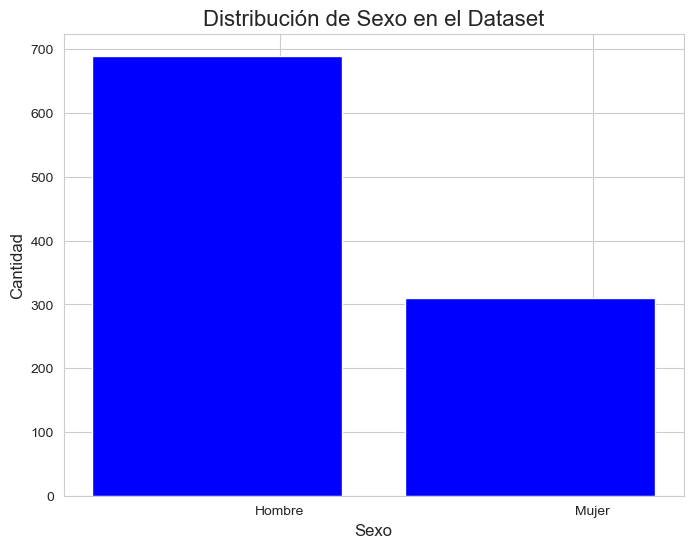

In [57]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))

plt.hist(df_banco['sexo'], bins=[0, 1, 2], rwidth=0.8, color='blue', align='left')

plt.title('Distribución de Sexo en el Dataset', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

plt.xticks([0.2, 1.2], ['Hombre', 'Mujer'])

plt.show()

In [58]:
# noinspection PyShadowingNames
def analisis_exploratorio():
    global df_banco
    histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
    lista_histogramas = list(enumerate(histogramas))
    plt.figure(figsize = (30,20))
    plt.title('Histogramas')
    for i in lista_histogramas:
        plt.subplot(3, 2, i[0]+1)
        sns.countplot(x = i[1], data = df_banco)
        plt.xlabel(i[1], fontsize=20)
        plt.ylabel('Total', fontsize=20)

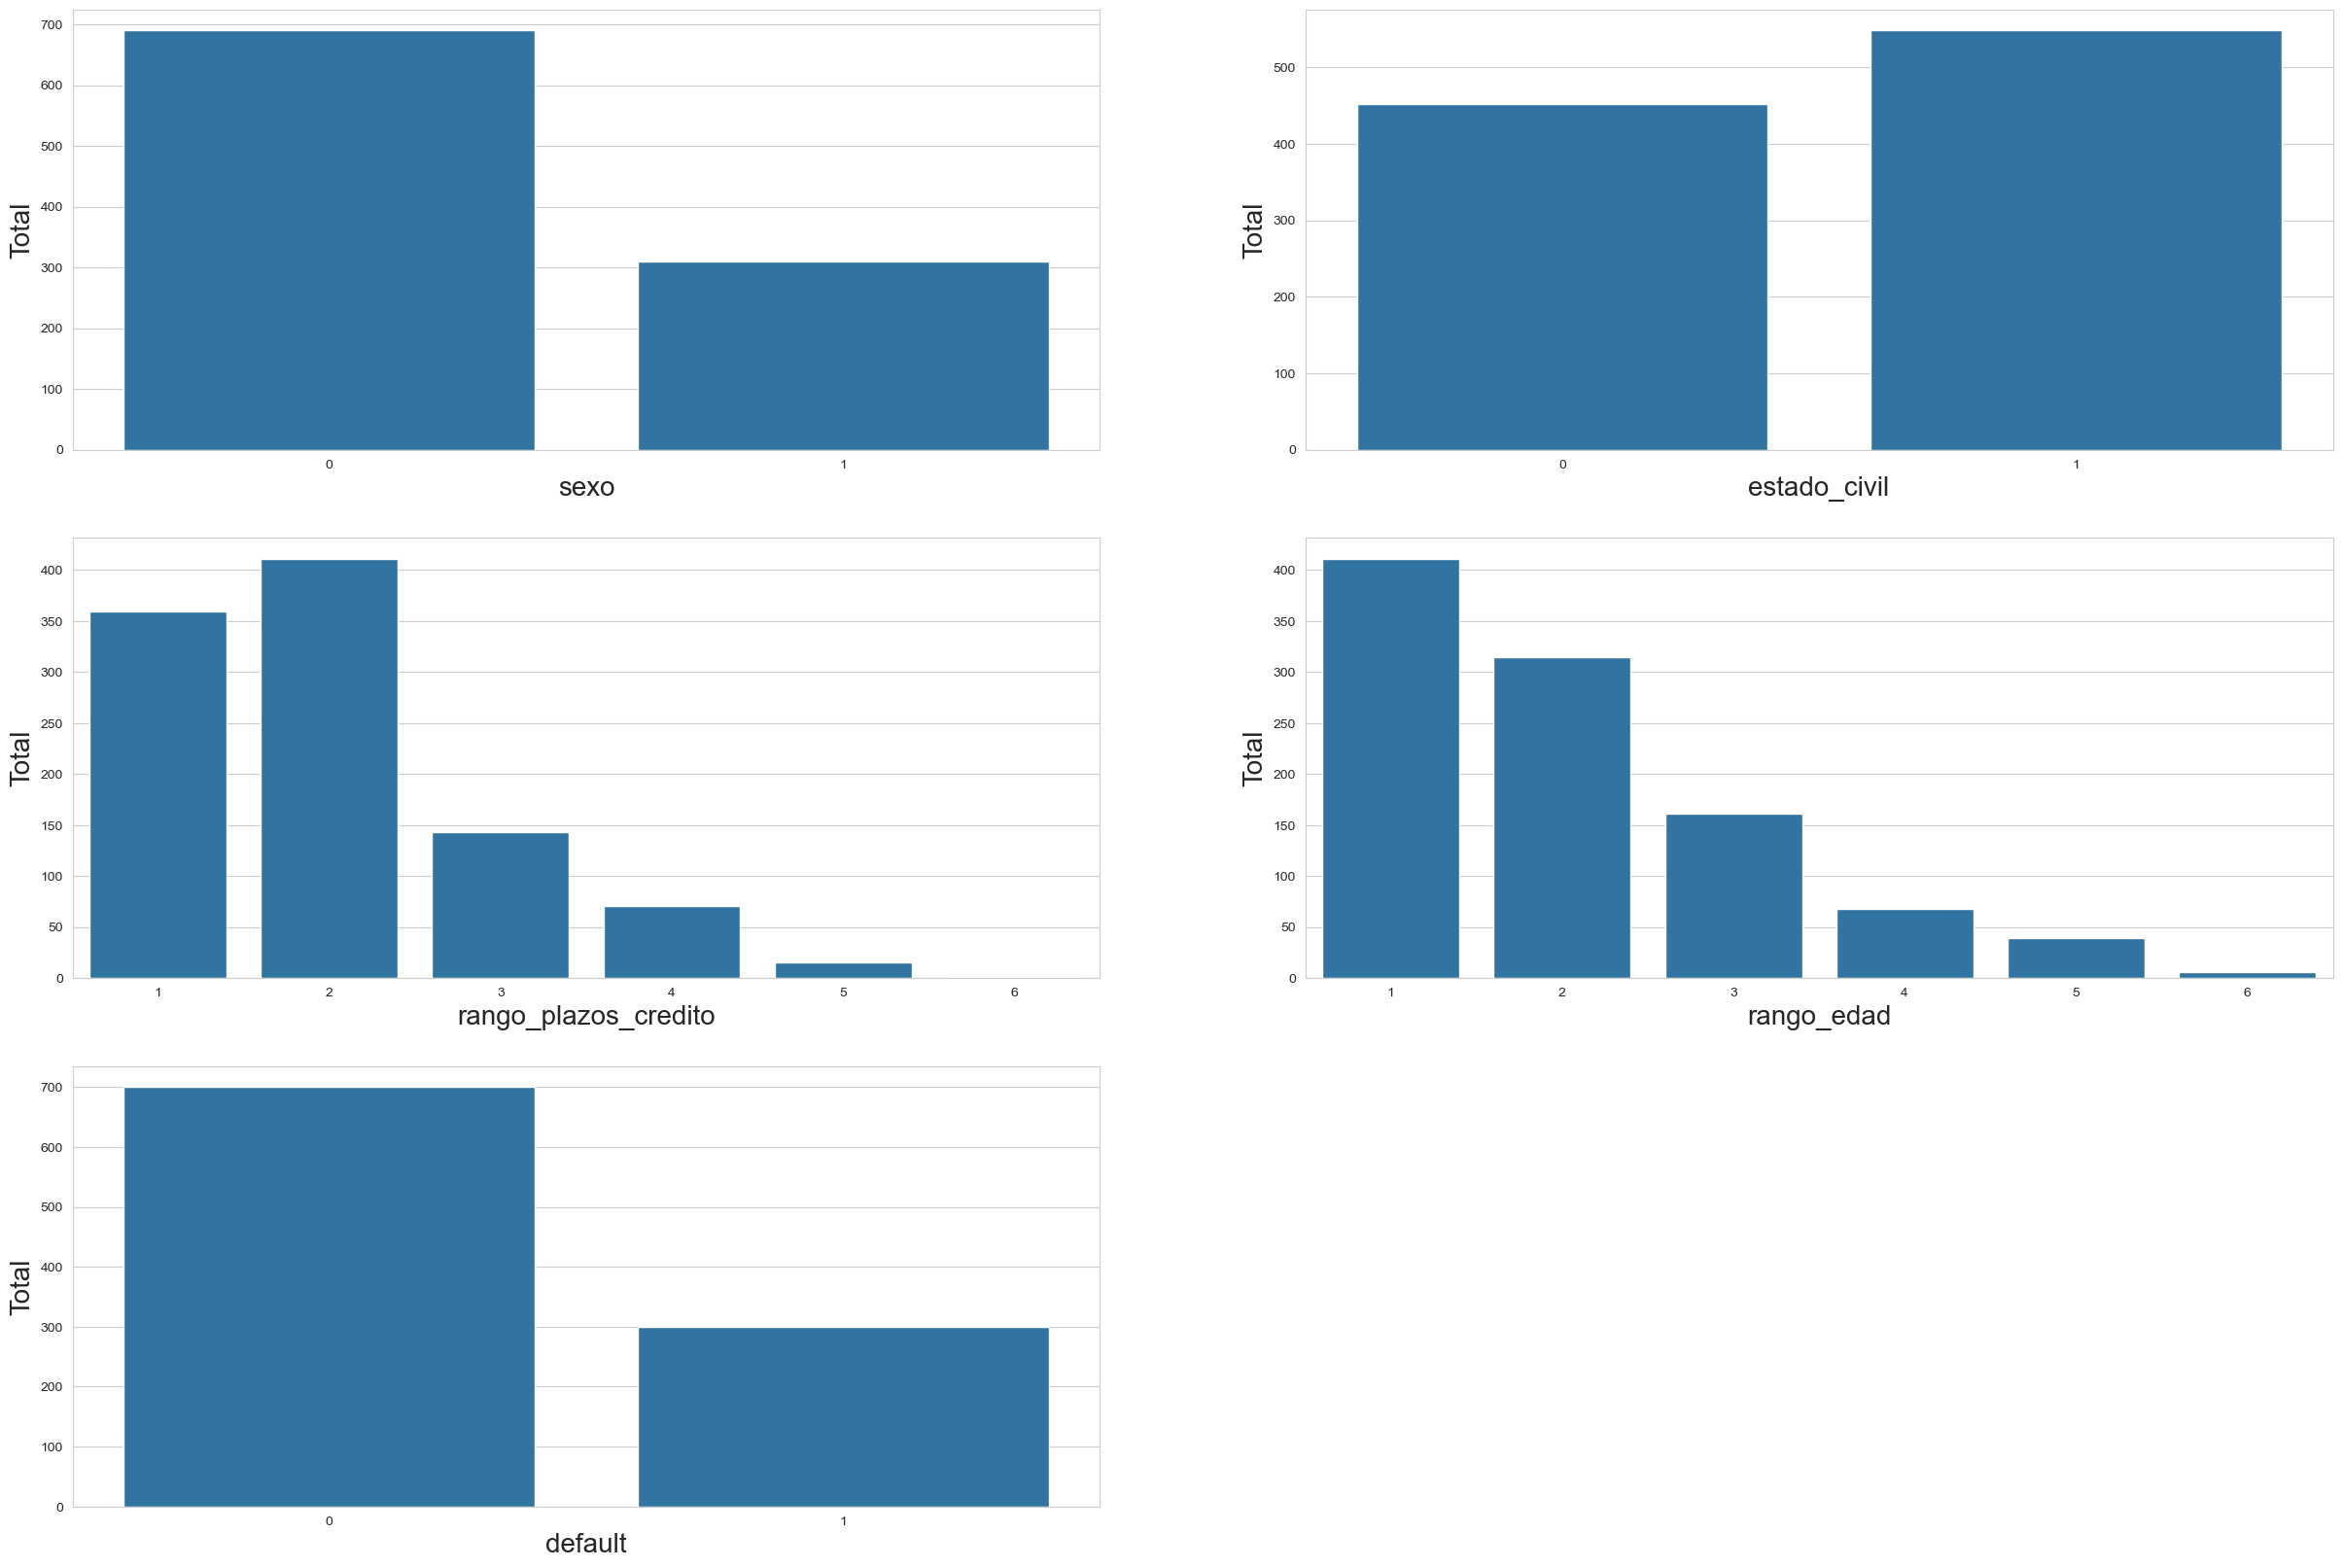

In [59]:
analisis_exploratorio()

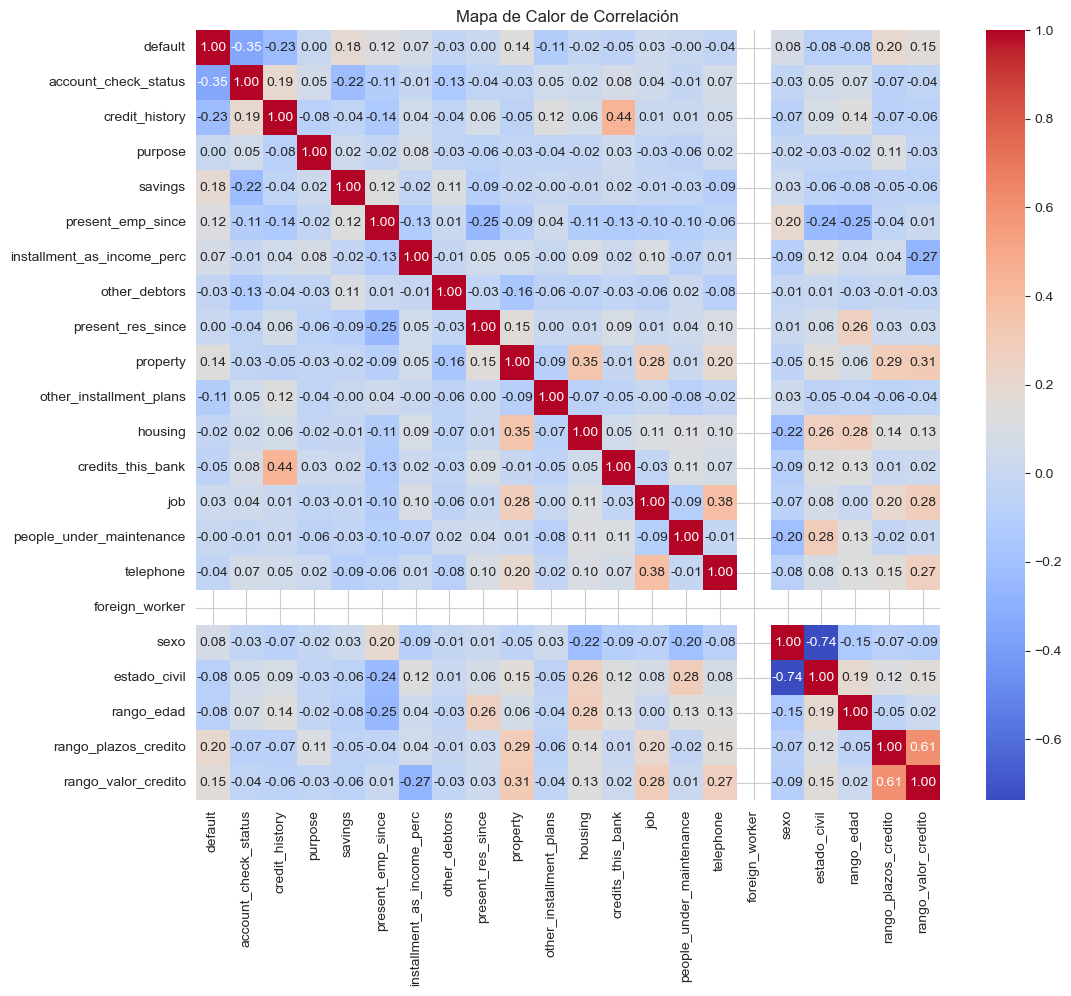

In [60]:
correlation_matrix = df_banco.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt = '.2f')
plt.title('Mapa de Calor de Correlación')
plt.show()

DESAFIOS

# Identificar valores o registros inapropiados:

Datos faltantes: La función procesar_datos() elimina las filas con valores faltantes. Esta no siempre es la mejor estrategia, ya que se puede perder información valiosa. Alternativas incluyen imputar los valores faltantes con la media, la mediana, o utilizando métodos más sofisticados. Sería crucial investigar si hay valores faltantes antes de eliminar las filas y considerar métodos de imputación.

Valores atípicos (Outliers): El código no aborda explícitamente la detección o el manejo de valores atípicos. Debería analizarse los histogramas y otras visualizaciones (box plots) para identificar posibles outliers en variables numéricas como 'credit_amount' y 'duration_in_month'. Si se encuentran outliers, considerarse
 estrategias como la transformación de variables, la eliminación, o el uso de modelos robustos a outliers. El análisis de los valores de la columna purpose después del mapeo también puede ser útil para identificar categorías poco frecuentes o potencialmente problemáticas. Por ejemplo, "(vacation - does not exist?)" parece inusual y merece investigación.

1. Histograma de sexo:

Forma: Claramente asimétrica, con una mayor cantidad de hombres (0) que de mujeres (1).

Valores más frecuentes: El valor 0 (hombres) es mucho más frecuente.

Dispersión: Baja dispersión, ya que solo hay dos valores posibles.

Posibles valores atípicos: No aplica en este caso debido a la naturaleza binaria de la variable.

Conclusión: El conjunto de datos está desbalanceado con respecto al sexo, con una representación significativamente mayor de clientes masculinos. Esto podría afectar el rendimiento de un modelo predictivo, especialmente si el sexo está relacionado con la variable objetivo (default).

1. Histograma de estado_civil:

Forma: Asimétrica, con predominancia del valor 1 (solteros).

Valores más frecuentes: 1 (solteros).

Dispersión: Baja dispersión, solo dos valores posibles.

Posibles valores atípicos: No aplica.

Conclusión: La mayoría de los clientes en el conjunto de datos son solteros. Similar al histograma de sexo, este desbalance podría influir en el modelo si el estado civil está relacionado con la probabilidad de incumplimiento. La forma en que se realizó la ingeniería de características para esta variable es peculiar, ya que combina solteros con personas divorciadas/separadas/casadas en la categoría 1, mientras que la categoría 0 representa hombres divorciados/separados y hombres y mujeres casados/viudos. Esto podría no ser la forma más informativa de representar el estado civil.

1. Histograma de rango_plazos_credito:

Forma: Asimétrica, con una mayor concentración en los rangos inferiores (plazos de crédito más cortos).

Valores más frecuentes: Los valores 1 y 2 (plazos cortos) son los más frecuentes.

Dispersión: Moderada dispersión, con una cola hacia la derecha.

Posibles valores atípicos: Los plazos más largos (5 y 6) tienen una frecuencia muy baja, pero no son necesariamente outliers.

Conclusión: La mayoría de los créditos otorgados tienen plazos cortos (entre 1 y 24 meses). Hay una disminución gradual en la cantidad de créditos a medida que aumenta el plazo.

1. Histograma de rango_edad:

Forma: Asimétrica, con una concentración en los rangos de edad entre 2 y 3 (30 a 50 años).

Valores más frecuentes: 2 (30-40 años), seguido por 3 (40-50 años).

Dispersión: Moderada dispersión, con colas a ambos lados.

Posibles valores atípicos: Los rangos de edad más extremos (1 y 6) son menos frecuentes.

Conclusión: La mayor parte de los clientes se encuentra en el rango de edad de 30 a 50 años. La distribución sugiere que las personas de mediana edad son las que solicitan créditos con mayor frecuencia.

1. Histograma de default:

Forma: Asimétrica, con una cantidad mucho mayor de clientes que no incumplen (0) que de clientes que sí incumplen (1).

Valores más frecuentes: 0 (no default).

Dispersión: Baja, solo dos valores posibles.

Posibles valores atípicos: No aplica.

# Conclusión: El conjunto de datos está desbalanceado con respecto a la variable objetivo default, con una proporción mucho mayor de clientes que no incumplen. Esto es común en conjuntos de datos de crédito y se debe tener en cuenta al construir el modelo. Se podrían necesitar técnicas como el sobremuestreo (oversampling) o el submuestreo (undersampling) para mitigar el efecto del desbalance en el rendimiento del modelo.

4. Construcción de Modelos

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder

# Cargar datos
df_banco = pd.read_csv('german_credit .csv')

# Identificar columnas categóricas
categorical_cols = df_banco.select_dtypes(include=['object']).columns

# Aplicar codificación one-hot a las columnas categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical_data = encoder.fit_transform(df_banco[categorical_cols])

# Crear un DataFrame con los datos categóricos codificados
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

# Eliminar las columnas categóricas originales y concatenar las columnas codificadas
df_banco = df_banco.drop(categorical_cols, axis=1)
df_banco = pd.concat([df_banco, encoded_categorical_df], axis=1)

# Separar características y variable objetivo
X = df_banco.drop('default', axis=1)  # Reemplazar 'default' con el nombre de su variable objetivo
y = df_banco['default']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir métricas de evaluación
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Accuracy: 0.77
Precision: 0.62
Recall: 0.54
F1 Score: 0.58
ROC AUC Score: 0.70


In [74]:

#@title
# noinspection PyShadowingNames
def crea_modelos():
    global df_banco, resultados
    y = df_banco['default']
    x = df_banco.drop(columns='default')
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

    models = {
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }

    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

    for name, model in models.items():
        model.fit(train_x, train_y)
        predictions = model.predict(test_x)
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(test_x)
            roc_auc = roc_auc_score(test_y, proba[:, 1])
        else:
            roc_auc = None

        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['AUC-ROC'].append(roc_auc)

    resultados = results

In [75]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
    print(model)
    print(resultados['Accuracy'][i])
    print(resultados['Precision'][i])
    print(resultados['Recall'][i])
    print(resultados['F1-score'][i])
    print(resultados['AUC-ROC'][i])
    print('\n')

Regresión Logística
0.7866666666666666
0.6527777777777778
0.5465116279069767
0.5949367088607594
0.7977613562269071


Árbol de Decisión
0.7066666666666667
0.4891304347826087
0.5232558139534884
0.5056179775280899
0.6518148228645947


Random Forest
0.77
0.6976744186046512
0.3488372093023256
0.46511627906976744
0.7726581178004782


Naive Bayes
0.7433333333333333
0.5405405405405406
0.6976744186046512
0.6091370558375634
0.7500543360139099




5. Evaluación y Selección del Modelo

In [66]:
#@title
def visualiza_resultados():
    global df_banco, resultados
    results_df = pd.DataFrame(resultados)
    results_df.set_index('Model', inplace=True)

    # Transponer el DataFrame para facilitar la representación
    results_df = results_df.T
    colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

    # Gráfico de barras agrupadas para cada métrica
    results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
    plt.title('Comparación de Métricas por Modelo')
    plt.xlabel('Métricas')
    plt.ylabel('Puntuación')
    plt.legend(title='Modelos')
    plt.tight_layout()
    plt.show()

    # @title Texto de título predeterminado
    from IPython.display import HTML, display

    # Texto que quieres centrar
    texto = "¿Cuál de estos modelos seleccionarías y por qué?"

    # Crear una celda HTML con el texto centrado
    display(HTML(f"{texto}"))
     

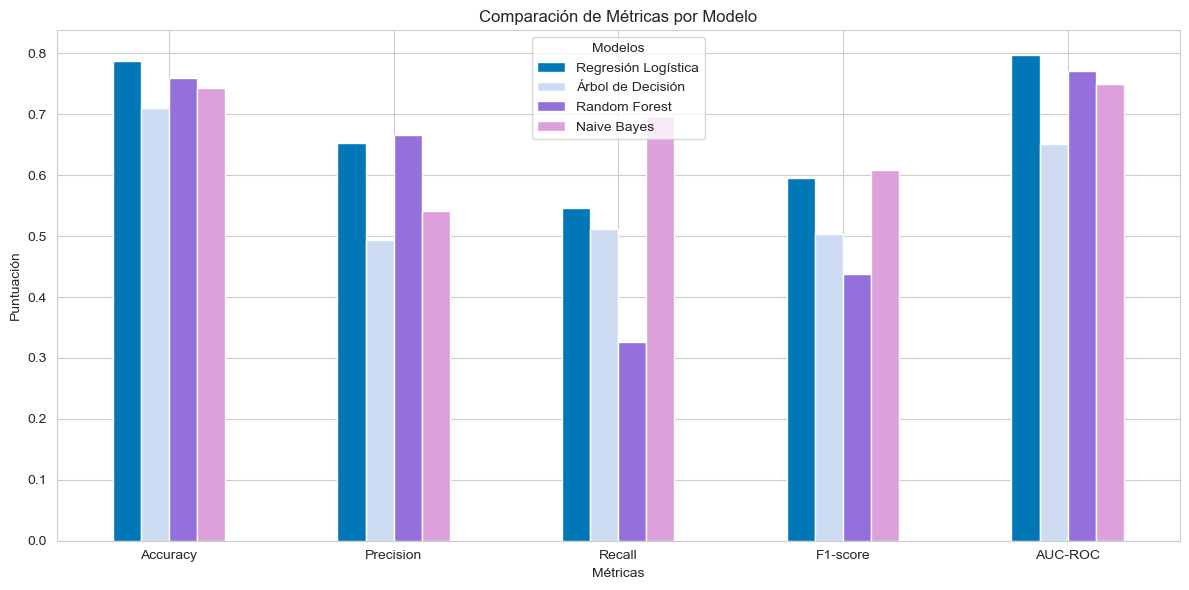

In [67]:
visualiza_resultados()

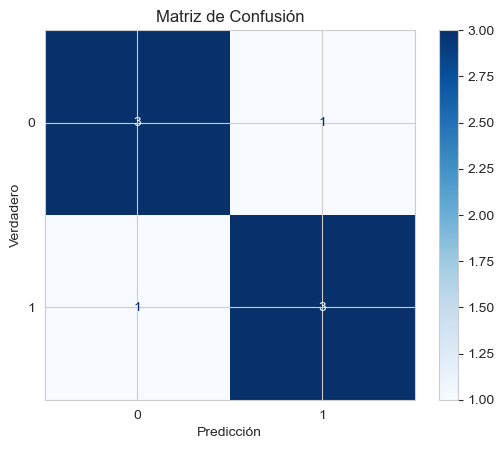

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Reemplaza estos con tus datos reales
y_true = [0, 1, 0, 1, 0, 1, 0, 1]  # Etiquetas verdaderas
y_pred = [0, 0, 0, 1, 0, 1, 1, 1]  # Predicciones del modelo

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Añadir etiquetas y título
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

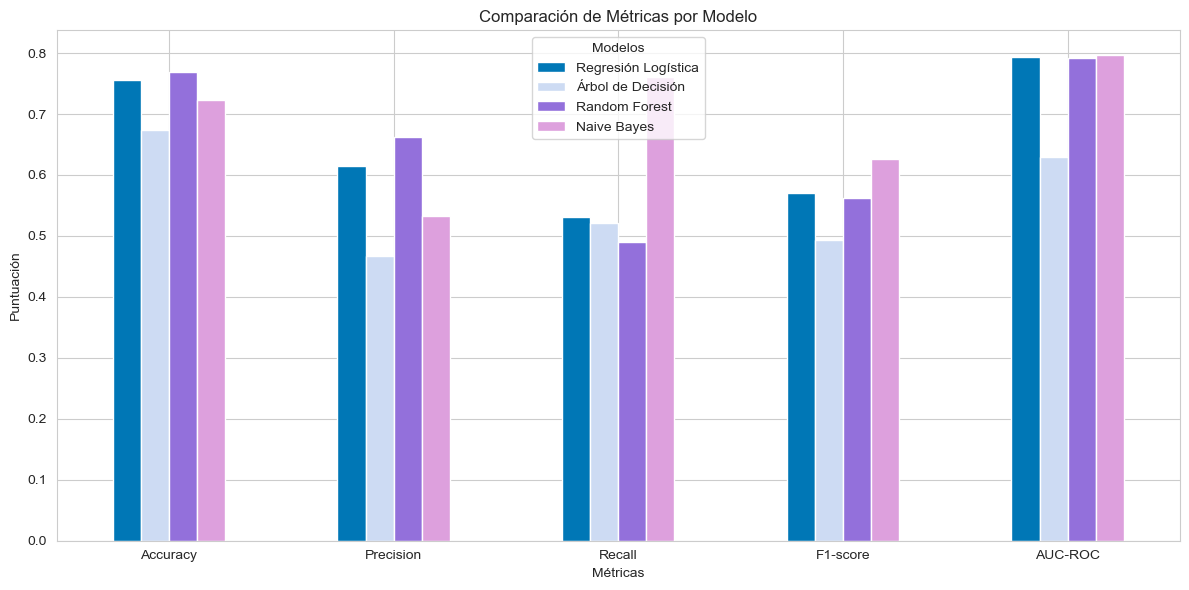

In [78]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Primero, asegúrate de que X e y estén definidos correctamente
y = df_banco['default']
X = df_banco.drop(columns='default')

# Crear un pipeline con SMOTE y RandomUnderSampler
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Aplicar el balanceo
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Ahora puedes usar X_resampled y y_resampled para dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=77)

# Modificar la función crea_modelos para usar estos nuevos conjuntos de datos
# noinspection PyShadowingNames
def crea_modelos():
    global resultados
    models = {
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }

    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(X_test)
            roc_auc = roc_auc_score(y_test, proba[:, 1])
        else:
            roc_auc = None

        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['AUC-ROC'].append(roc_auc)

    resultados = results

# Ejecutar la función crea_modelos con los datos balanceados
crea_modelos()

# Visualizar los resultados
visualiza_resultados()

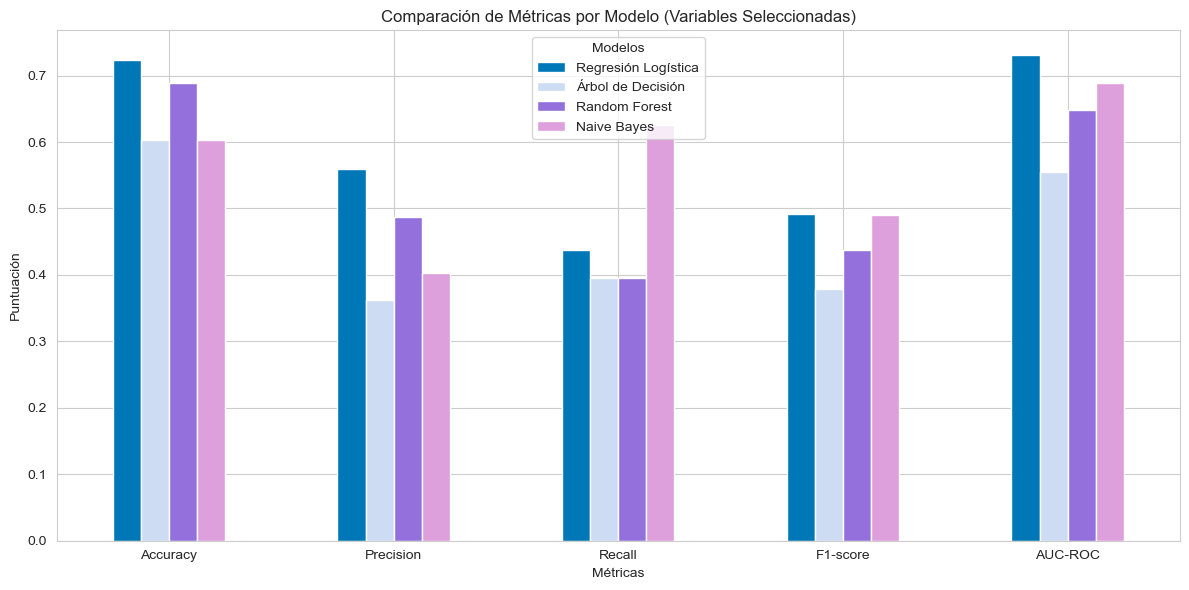

Resultados con variables seleccionadas:
                     Accuracy  Precision    Recall  F1-score   AUC-ROC
Model                                                                 
Regresión Logística  0.723810   0.560000  0.437500  0.491228  0.731402
Árbol de Decisión    0.603175   0.361905  0.395833  0.378109  0.554937
Random Forest        0.688889   0.487179  0.395833  0.436782  0.648545
Naive Bayes          0.603175   0.402685  0.625000  0.489796  0.688118
Columnas del DataFrame: Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance',
       'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_histo

In [83]:
# Seleccionar un subconjunto de variables disponibles en el DataFrame
selected_features = [
    'credit_history_critical account/ other credits existing (not at this bank)',
    'credit_history_delay in paying off in the past',
    'credit_history_existing credits paid back duly till now',
    'credit_history_no credits taken/ all credits paid back duly',
    'purpose_business', 'purpose_car (new)', 'purpose_car (used)',
    'purpose_domestic appliances', 'purpose_education',
    'purpose_furniture/equipment', 'purpose_radio/television',
    'purpose_repairs', 'purpose_retraining', 'savings_... < 100 DM',
    'savings_100 <= ... < 500 DM', 'savings_500 <= ... < 1000 DM ',
    'savings_unknown/ no savings account',
    'present_emp_since_... < 1 year ',
    'present_emp_since_1 <= ... < 4 years',
    'present_emp_since_4 <= ... < 7 years', 'present_emp_since_unemployed',
    'other_debtors_guarantor', 'other_debtors_none',
    'property_if not A121/A122 : car or other, not in attribute 6',
    'property_real estate', 'property_unknown / no property',
    'job_skilled employee / official', 'job_unemployed/ unskilled - non-resident',
    'job_unskilled - resident'
]

# Verificar que las características seleccionadas están presentes en el DataFrame
missing_features = [feature for feature in selected_features if feature not in df_banco.columns]
if not missing_features:
    # Crear un nuevo DataFrame con las variables seleccionadas
    X_selected = df_banco[selected_features]
    y = df_banco['default']

    # Aplicar el balanceo de clases
    over = SMOTE(sampling_strategy=0.5)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)

    X_resampled, y_resampled = pipeline.fit_resample(X_selected, y)

    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=77)

    # Función para crear y evaluar modelos
    # noinspection PyShadowingNames
    def crea_modelos_seleccionados():
        models = {
            'Regresión Logística': LogisticRegression(),
            'Árbol de Decisión': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(),
            'Naive Bayes': GaussianNB()
        }

        results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

        for name, model in models.items():
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            accuracy = accuracy_score(y_test, predictions)
            precision = precision_score(y_test, predictions)
            recall = recall_score(y_test, predictions)
            f1 = f1_score(y_test, predictions)
            if hasattr(model, "predict_proba"):
                proba = model.predict_proba(X_test)
                roc_auc = roc_auc_score(y_test, proba[:, 1])
            else:
                roc_auc = None

            results['Model'].append(name)
            results['Accuracy'].append(accuracy)
            results['Precision'].append(precision)
            results['Recall'].append(recall)
            results['F1-score'].append(f1)
            results['AUC-ROC'].append(roc_auc)

        return results

    # Crear y evaluar modelos con las variables seleccionadas
    resultados_seleccionados = crea_modelos_seleccionados()

    # Visualizar los resultados
    # noinspection PyShadowingNames,PyUnboundLocalVariable
    def visualiza_resultados_seleccionados(resultados):
        results_df = pd.DataFrame(resultados)
        results_df.set_index('Model', inplace=True)

        results_df = results_df.T
        colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

        results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
        plt.title('Comparación de Métricas por Modelo (Variables Seleccionadas)')
        plt.xlabel('Métricas')
        plt.ylabel('Puntuación')
        plt.legend(title='Modelos')
        plt.tight_layout()
        plt.show()

    visualiza_resultados_seleccionados(resultados_seleccionados)

    # Comparar los resultados
    print("Resultados con variables seleccionadas:")
    print(pd.DataFrame(resultados_seleccionados).set_index('Model'))
else:
    print("Some of the selected features are not present in the DataFrame. Missing features:", missing_features)# Seleccionar un subconjunto de variables
selected_features = ['credit_history', 'purpose', 'credit_amount', 'savings', 'present_emp_since', 'installment_rate', 'age', 'other_debtors', 'property', 'job']

# Imprimir las columnas del DataFrame
print("Columnas del DataFrame:", df_banco.columns)

# Verificar que las características seleccionadas están presentes en el DataFrame
missing_features = [feature for feature in selected_features if feature not in df_banco.columns]
if not missing_features:
    # Crear un nuevo DataFrame con las variables seleccionadas
    X_selected = df_banco[selected_features]
    y = df_banco['default']

    # Aplicar el balanceo de clases
    over = SMOTE(sampling_strategy=0.5)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)

    X_resampled, y_resampled = pipeline.fit_resample(X_selected, y)

    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=77)

    # Función para crear y evaluar modelos
    # noinspection PyShadowingNames
    def crea_modelos_seleccionados():
        models = {
            'Regresión Logística': LogisticRegression(),
            'Árbol de Decisión': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(),
            'Naive Bayes': GaussianNB()
        }

        results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

        for name, model in models.items():
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            accuracy = accuracy_score(y_test, predictions)
            precision = precision_score(y_test, predictions)
            recall = recall_score(y_test, predictions)
            f1 = f1_score(y_test, predictions)
            if hasattr(model, "predict_proba"):
                proba = model.predict_proba(X_test)
                roc_auc = roc_auc_score(y_test, proba[:, 1])
            else:
                roc_auc = None

            results['Model'].append(name)
            results['Accuracy'].append(accuracy)
            results['Precision'].append(precision)
            results['Recall'].append(recall)
            results['F1-score'].append(f1)
            results['AUC-ROC'].append(roc_auc)

        return results

    # Crear y evaluar modelos con las variables seleccionadas
    resultados_seleccionados = crea_modelos_seleccionados()

    # Visualizar los resultados
    # noinspection PyShadowingNames
    def visualiza_resultados_seleccionados(resultados):
        results_df = pd.DataFrame(resultados)
        results_df.set_index('Model', inplace=True)

        results_df = results_df.T
        colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

        results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
        plt.title('Comparación de Métricas por Modelo (Variables Seleccionadas)')
        plt.xlabel('Métricas')
        plt.ylabel('Puntuación')
        plt.legend(title='Modelos')
        plt.tight_layout()
        plt.show()

    visualiza_resultados_seleccionados(resultados_seleccionados)

    # Comparar los resultados
    print("Resultados con todas las variables:")
    print(pd.DataFrame(resultados).set_index('Model'))
    print("\nResultados con variables seleccionadas:")
    print(pd.DataFrame(resultados_seleccionados).set_index('Model'))
else:
    print("Some of the selected features are not present in the DataFrame. Missing features:", missing_features)